In [9]:
from IPython.display import Image
from IPython.core.display import HTML 


In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [11]:
df_orders = pd.read_csv('../data/orders.csv', header=1)

In [12]:
df_orders.columns= df_orders.columns.str.lower()

## Cleaning data

#cleaning 'order_process.csv'

In [13]:
df_order_process = pd.read_csv('../data/order_process.csv', header = 0)
df_order_process.columns = df_order_process.columns.str.lower()

In [14]:
df_order_process

,row id,order id,order date,on truck scan date,ship mode
0,3074,CA-2019-125206,3/1/2019,07/01/2019,Express
1,4919,CA-2019-160304,2/1/2019,09/01/2019,Standard Processing
2,4920,CA-2019-160304,2/1/2019,09/01/2019,Standard Processing
3,8604,US-2019-116365,3/1/2019,09/01/2019,Standard Processing
4,8605,US-2019-116365,3/1/2019,09/01/2019,Standard Processing
...,...,...,...,...,...
5894,908,CA-2020-143259,30/12/2020,06/01/2021,Standard Processing
5895,909,CA-2020-143259,30/12/2020,06/01/2021,Standard Processing
5896,1297,CA-2020-115427,30/12/2020,06/01/2021,Standard Processing
5897,1298,CA-2020-115427,30/12/2020,06/01/2021,Standard Processing


In [15]:
order_process_dup = df_order_process.copy()

In [16]:
order_process_dup

,row id,order id,order date,on truck scan date,ship mode
0,3074,CA-2019-125206,3/1/2019,07/01/2019,Express
1,4919,CA-2019-160304,2/1/2019,09/01/2019,Standard Processing
2,4920,CA-2019-160304,2/1/2019,09/01/2019,Standard Processing
3,8604,US-2019-116365,3/1/2019,09/01/2019,Standard Processing
4,8605,US-2019-116365,3/1/2019,09/01/2019,Standard Processing
...,...,...,...,...,...
5894,908,CA-2020-143259,30/12/2020,06/01/2021,Standard Processing
5895,909,CA-2020-143259,30/12/2020,06/01/2021,Standard Processing
5896,1297,CA-2020-115427,30/12/2020,06/01/2021,Standard Processing
5897,1298,CA-2020-115427,30/12/2020,06/01/2021,Standard Processing


In [17]:
order_process_dup.info()
#upon checking, there is no null value in the table, 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5899 entries, 0 to 5898
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   row id              5899 non-null   int64 
 1   order id            5899 non-null   object
 2   order date          5899 non-null   object
 3   on truck scan date  5899 non-null   object
 4   ship mode           5899 non-null   object
dtypes: int64(1), object(4)
memory usage: 230.6+ KB


In [18]:
#begin checking duplicates
# Firstly sort out the duplicated order id 
order_process_dup_order_id = order_process_dup[order_process_dup['order id'].duplicated(keep=False)].sort_values('order id')

In [19]:
order_process_dup_order_id.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4341 entries, 2122 to 3795
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   row id              4341 non-null   int64 
 1   order id            4341 non-null   object
 2   order date          4341 non-null   object
 3   on truck scan date  4341 non-null   object
 4   ship mode           4341 non-null   object
dtypes: int64(1), object(4)
memory usage: 203.5+ KB


In [20]:
#there are totally 4341 duplicated order id, from 1444 unique order id. These duplicated is because each
# order has different products id, each products id is listed as 1 row, 
order_process_dup_order_id['order id'].nunique()

1444

In [21]:
#drop the 'row id' columns to check duplicates again:
order_process_dup_order_id.drop('row id', axis=1, inplace=True)

In [22]:
#all the orders have the items left on the same date. Except for order 'CA-2020-101182' 2 items on different 
# on truck scan date
order_process_dup_order_id.drop_duplicates(keep=False)

,order id,order date,on truck scan date,ship mode
4216,CA-2020-101182,4/9/2020,07/09/2020,Express
4217,CA-2020-101182,4/9/2020,08/09/2020,Express


In [23]:
df_order_process[df_order_process['order id']=='CA-2020-101182']

,row id,order id,order date,on truck scan date,ship mode
4216,3080,CA-2020-101182,4/9/2020,07/09/2020,Express
4217,3081,CA-2020-101182,4/9/2020,08/09/2020,Express


In [24]:
#check the aboved order id in the orders.csv file: 

df_orders[df_orders['order id']=='CA-2020-101182']

,index,order id,order date,ship mode,customer id,customer name,origin channel,country/region,city,state,postal code,region,category,sub-category,product id,sales,quantity,discount,profit
2542,3080,CA-2020-101182,4/9/2020,First Class,KB-16405,Katrina Bavinger,Facebook,United States,Apple Valley,California,92307.0,West,Power Muesli,Nuts and more,OFF-PA-10001800,12.960,2,0.0,6.2208
3772,3081,CA-2020-101182,4/9/2020,First Class,KB-16405,Katrina Bavinger,Facebook,United States,Apple Valley,California,92307.0,West,Special Projects Muesil,Only Oats,TEC-PH-10003589,43.176,3,0.2,15.1116


## Cleaning orders.csv

In [25]:
df_orders

,index,order id,order date,ship mode,customer id,customer name,origin channel,country/region,city,state,postal code,region,category,sub-category,product id,sales,quantity,discount,profit
0,27,CA-2019-121755,16/1/2019,Second Class,EH-13945,Eric Hoffmann,Email,United States,Los Angeles,California,90049.0,West,Special Projects Muesil,Gluten Free,TEC-AC-10003027,90.570,3,0.0,11.7741
1,45,CA-2019-118255,11/3/2019,First Class,ON-18715,Odella Nelson,Sales,United States,Eagan,Minnesota,55122.0,Central,Special Projects Muesil,Gluten Free,TEC-AC-10000171,45.980,2,0.0,19.7714
2,48,CA-2019-169194,20/6/2019,Standard Class,LH-16900,Lena Hernandez,Email,United States,Dover,Delaware,19901.0,East,Special Projects Muesil,Gluten Free,TEC-AC-10002167,45.000,3,0.0,4.9500
3,60,CA-2019-111682,17/6/2019,First Class,TB-21055,Ted Butterfield,Email,United States,Troy,New York,12180.0,East,Special Projects Muesil,Gluten Free,TEC-AC-10002167,30.000,2,0.0,3.3000
4,63,CA-2018-135545,24/11/2018,Standard Class,KM-16720,Kunst Miller,Email,United States,Los Angeles,California,90004.0,West,Special Projects Muesil,Gluten Free,TEC-AC-10004633,13.980,2,0.0,6.1512
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9894,US-2019-115441,25/7/2019,Second Class,SH-19975,Sally Hughsby,Sales,United States,Milwaukee,Wisconsin,53209.0,Central,Toasted Muesli,With Nuts,FUR-CH-10004626,403.560,4,0.0,96.8544
9990,9908,US-2018-129007,13/9/2018,First Class,KD-16615,Ken Dana,Sales,United States,Anaheim,California,92804.0,West,Toasted Muesli,With Nuts,FUR-CH-10000155,717.720,3,0.2,71.7720
9991,9913,CA-2018-132388,10/10/2018,First Class,KN-16390,Katherine Nockton,Sales,United States,Santa Barbara,California,93101.0,West,Toasted Muesli,With Nuts,FUR-CH-10001714,362.136,3,0.2,-54.3204
9992,9920,CA-2019-149272,15/3/2019,Standard Class,MY-18295,Muhammed Yedwab,Sales,United States,Bryan,Texas,77803.0,Central,Toasted Muesli,With Nuts,FUR-CH-10000863,528.430,5,0.3,-143.4310


In [26]:
# index columns is id for each products_id in each orders, so it should be unique in every row, 
# Checking duplicates on index column and there is no duplicated index, 
df_orders['index'].duplicated().value_counts()

index
False    9994
Name: count, dtype: int64

In [27]:
# Now trying to drop index columns and check duplicates again, 
orders_dup = df_orders.drop('index', axis=1)
orders_dup

,order id,order date,ship mode,customer id,customer name,origin channel,country/region,city,state,postal code,region,category,sub-category,product id,sales,quantity,discount,profit
0,CA-2019-121755,16/1/2019,Second Class,EH-13945,Eric Hoffmann,Email,United States,Los Angeles,California,90049.0,West,Special Projects Muesil,Gluten Free,TEC-AC-10003027,90.570,3,0.0,11.7741
1,CA-2019-118255,11/3/2019,First Class,ON-18715,Odella Nelson,Sales,United States,Eagan,Minnesota,55122.0,Central,Special Projects Muesil,Gluten Free,TEC-AC-10000171,45.980,2,0.0,19.7714
2,CA-2019-169194,20/6/2019,Standard Class,LH-16900,Lena Hernandez,Email,United States,Dover,Delaware,19901.0,East,Special Projects Muesil,Gluten Free,TEC-AC-10002167,45.000,3,0.0,4.9500
3,CA-2019-111682,17/6/2019,First Class,TB-21055,Ted Butterfield,Email,United States,Troy,New York,12180.0,East,Special Projects Muesil,Gluten Free,TEC-AC-10002167,30.000,2,0.0,3.3000
4,CA-2018-135545,24/11/2018,Standard Class,KM-16720,Kunst Miller,Email,United States,Los Angeles,California,90004.0,West,Special Projects Muesil,Gluten Free,TEC-AC-10004633,13.980,2,0.0,6.1512
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,US-2019-115441,25/7/2019,Second Class,SH-19975,Sally Hughsby,Sales,United States,Milwaukee,Wisconsin,53209.0,Central,Toasted Muesli,With Nuts,FUR-CH-10004626,403.560,4,0.0,96.8544
9990,US-2018-129007,13/9/2018,First Class,KD-16615,Ken Dana,Sales,United States,Anaheim,California,92804.0,West,Toasted Muesli,With Nuts,FUR-CH-10000155,717.720,3,0.2,71.7720
9991,CA-2018-132388,10/10/2018,First Class,KN-16390,Katherine Nockton,Sales,United States,Santa Barbara,California,93101.0,West,Toasted Muesli,With Nuts,FUR-CH-10001714,362.136,3,0.2,-54.3204
9992,CA-2019-149272,15/3/2019,Standard Class,MY-18295,Muhammed Yedwab,Sales,United States,Bryan,Texas,77803.0,Central,Toasted Muesli,With Nuts,FUR-CH-10000863,528.430,5,0.3,-143.4310


In [28]:
#upon checking there are 2 rows with different index column value but actually duplicate, 
#since all the value is the same from products id to quantity, 
orders_dup[orders_dup.duplicated(keep=False)]

,order id,order date,ship mode,customer id,customer name,origin channel,country/region,city,state,postal code,region,category,sub-category,product id,sales,quantity,discount,profit
9579,US-2017-150119,23/4/2017,Standard Class,LB-16795,Laurel Beltran,Facebook,United States,Columbus,Ohio,43229.0,East,Toasted Muesli,With Nuts,FUR-CH-10002965,281.372,2,0.3,-12.0588
9580,US-2017-150119,23/4/2017,Standard Class,LB-16795,Laurel Beltran,Facebook,United States,Columbus,Ohio,43229.0,East,Toasted Muesli,With Nuts,FUR-CH-10002965,281.372,2,0.3,-12.0588


In [29]:
# Dicision: Drop the duplicated row above fro df_orders 
df_orders.drop(df_orders.index[orders_dup.duplicated(keep='first')], inplace=True)

In [30]:
# Checking again the order ID that contained dropped rows, there is no duplicates for this order ID anymore, 
df_orders[df_orders['order id']=='US-2017-150119']

,index,order id,order date,ship mode,customer id,customer name,origin channel,country/region,city,state,postal code,region,category,sub-category,product id,sales,quantity,discount,profit
6073,3408,US-2017-150119,23/4/2017,Standard Class,LB-16795,Laurel Beltran,Facebook,United States,Columbus,Ohio,43229.0,East,Power Muesli,Super Fibre Boost,OFF-BI-10000145,7.488,8,0.7,-5.2416
8747,3409,US-2017-150119,23/4/2017,Standard Class,LB-16795,Laurel Beltran,Facebook,United States,Columbus,Ohio,43229.0,East,Toasted Muesli,With Fruit and Nuts,FUR-FU-10002191,22.336,4,0.2,7.8176
9579,3406,US-2017-150119,23/4/2017,Standard Class,LB-16795,Laurel Beltran,Facebook,United States,Columbus,Ohio,43229.0,East,Toasted Muesli,With Nuts,FUR-CH-10002965,281.372,2,0.3,-12.0588


In [31]:
df_orders.shape

(9993, 19)

In [32]:
df_order_process

,row id,order id,order date,on truck scan date,ship mode
0,3074,CA-2019-125206,3/1/2019,07/01/2019,Express
1,4919,CA-2019-160304,2/1/2019,09/01/2019,Standard Processing
2,4920,CA-2019-160304,2/1/2019,09/01/2019,Standard Processing
3,8604,US-2019-116365,3/1/2019,09/01/2019,Standard Processing
4,8605,US-2019-116365,3/1/2019,09/01/2019,Standard Processing
...,...,...,...,...,...
5894,908,CA-2020-143259,30/12/2020,06/01/2021,Standard Processing
5895,909,CA-2020-143259,30/12/2020,06/01/2021,Standard Processing
5896,1297,CA-2020-115427,30/12/2020,06/01/2021,Standard Processing
5897,1298,CA-2020-115427,30/12/2020,06/01/2021,Standard Processing


## Merging order_process and orders

In [33]:
merged_order_process = pd.merge(right=df_order_process, left= df_orders, left_on='index', right_on='row id', how='right')

In [34]:
merged_order_process.columns

Index(['index', 'order id_x', 'order date_x', 'ship mode_x', 'customer id',
       'customer name', 'origin channel', 'country/region', 'city', 'state',
       'postal code', 'region', 'category', 'sub-category', 'product id',
       'sales', 'quantity', 'discount', 'profit', 'row id', 'order id_y',
       'order date_y', 'on truck scan date', 'ship mode_y'],
      dtype='object')

In [35]:
merged_order_process.info()
#after merging, the dataframe still have 5899 rows without any null value, 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5899 entries, 0 to 5898
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   index               5899 non-null   int64  
 1   order id_x          5899 non-null   object 
 2   order date_x        5899 non-null   object 
 3   ship mode_x         5899 non-null   object 
 4   customer id         5899 non-null   object 
 5   customer name       5899 non-null   object 
 6   origin channel      5899 non-null   object 
 7   country/region      5899 non-null   object 
 8   city                5899 non-null   object 
 9   state               5899 non-null   object 
 10  postal code         5890 non-null   float64
 11  region              5899 non-null   object 
 12  category            5899 non-null   object 
 13  sub-category        5899 non-null   object 
 14  product id          5899 non-null   object 
 15  sales               5899 non-null   float64
 16  quanti

In [36]:
# Notice that the ship mode in the order files and in order processing file is different,
# upon checking, 'First class '== 'Express', ('Standard Class' or 'Second Class) == 'Standard Processing'
# Decision: Drop the column 'ship mode_x'
print(merged_order_process['ship mode_x'].unique())
print(merged_order_process['ship mode_y'].unique())

['First Class' 'Standard Class' 'Second Class']
['Express' 'Standard Processing']


In [37]:
# Check 'Second Class'
merged_order_process[['ship mode_x', 'ship mode_y']][merged_order_process['ship mode_x']=='Second Class'].value_counts('ship mode_y')

ship mode_y
Standard Processing    1147
Name: count, dtype: int64

In [38]:
# check 'Standard Class'
merged_order_process[['ship mode_x', 'ship mode_y']][merged_order_process['ship mode_x']=='Standard Class'].value_counts('ship mode_y')

ship mode_y
Standard Processing    3449
Name: count, dtype: int64

In [39]:
# check 'First Class'
merged_order_process[['ship mode_x', 'ship mode_y']][merged_order_process['ship mode_x']=='First Class'].value_counts('ship mode_y')

ship mode_y
Express    1303
Name: count, dtype: int64

In [40]:
#drop columns
merged_order_process.drop(columns=['row id', 'order id_y', 'order date_y', 'ship mode_x', 'customer name',
                                    'origin channel', 'discount', 'profit','country/region','city','state',
                                    'region','postal code','category','sub-category','customer id'], inplace=True)

In [41]:
# rename columns
merged_order_process.columns = ['index', 'order id', 'order date', 'product id', 'sales',
       'quantity', 'on truck scan date', 'ship mode']

In [42]:
merged_order_process

,index,order id,order date,product id,sales,quantity,on truck scan date,ship mode
0,3074,CA-2019-125206,3/1/2019,OFF-ST-10003692,114.460,2,07/01/2019,Express
1,4919,CA-2019-160304,2/1/2019,FUR-BO-10004709,173.940,3,09/01/2019,Standard Processing
2,4920,CA-2019-160304,2/1/2019,TEC-PH-10000455,231.980,2,09/01/2019,Standard Processing
3,8604,US-2019-116365,3/1/2019,TEC-AC-10002217,30.080,2,09/01/2019,Standard Processing
4,8605,US-2019-116365,3/1/2019,TEC-AC-10002942,165.600,3,09/01/2019,Standard Processing
...,...,...,...,...,...,...,...,...
5894,908,CA-2020-143259,30/12/2020,TEC-PH-10004774,90.930,7,06/01/2021,Standard Processing
5895,909,CA-2020-143259,30/12/2020,OFF-BI-10003684,52.776,3,06/01/2021,Standard Processing
5896,1297,CA-2020-115427,30/12/2020,OFF-BI-10002103,13.904,2,06/01/2021,Standard Processing
5897,1298,CA-2020-115427,30/12/2020,OFF-BI-10004632,20.720,2,06/01/2021,Standard Processing


In [43]:
merged_order_process['order date'] = pd.to_datetime(merged_order_process['order date'], format= 'mixed', dayfirst=True)

In [44]:
merged_order_process['on truck scan date'] = pd.to_datetime(merged_order_process['on truck scan date'], format= 'mixed', dayfirst=True)

In [45]:
merged_order_process

,index,order id,order date,product id,sales,quantity,on truck scan date,ship mode
0,3074,CA-2019-125206,2019-01-03,OFF-ST-10003692,114.460,2,2019-01-07,Express
1,4919,CA-2019-160304,2019-01-02,FUR-BO-10004709,173.940,3,2019-01-09,Standard Processing
2,4920,CA-2019-160304,2019-01-02,TEC-PH-10000455,231.980,2,2019-01-09,Standard Processing
3,8604,US-2019-116365,2019-01-03,TEC-AC-10002217,30.080,2,2019-01-09,Standard Processing
4,8605,US-2019-116365,2019-01-03,TEC-AC-10002942,165.600,3,2019-01-09,Standard Processing
...,...,...,...,...,...,...,...,...
5894,908,CA-2020-143259,2020-12-30,TEC-PH-10004774,90.930,7,2021-01-06,Standard Processing
5895,909,CA-2020-143259,2020-12-30,OFF-BI-10003684,52.776,3,2021-01-06,Standard Processing
5896,1297,CA-2020-115427,2020-12-30,OFF-BI-10002103,13.904,2,2021-01-06,Standard Processing
5897,1298,CA-2020-115427,2020-12-30,OFF-BI-10004632,20.720,2,2021-01-06,Standard Processing


In [117]:
merged_order_process_grouped = merged_order_process.groupby('order id').agg({'order date': 'min',
                                              'sales': 'sum',
                                              'quantity': 'sum',
                                              'on truck scan date': 'max',
                                              'ship mode':'first'
                                                }).reset_index()

In [118]:
merged_order_process_grouped

,order id,order date,sales,quantity,on truck scan date,ship mode
0,CA-2019-100041,2019-11-20,328.540,6,2019-11-27,Standard Processing
1,CA-2019-100083,2019-11-24,24.784,1,2019-12-04,Standard Processing
2,CA-2019-100153,2019-12-13,63.880,4,2019-12-18,Standard Processing
3,CA-2019-100202,2019-12-31,302.376,3,2020-01-08,Standard Processing
4,CA-2019-100244,2019-09-20,475.694,19,2019-09-25,Standard Processing
...,...,...,...,...,...,...
2997,US-2020-168802,2020-11-03,18.368,4,2020-11-12,Standard Processing
2998,US-2020-169320,2020-07-23,171.430,7,2020-07-29,Standard Processing
2999,US-2020-169488,2020-09-07,56.860,7,2020-09-09,Express
3000,US-2020-169502,2020-08-28,113.410,8,2020-09-02,Standard Processing


In [119]:
merged_order_process_grouped['process days'] = (merged_order_process_grouped['on truck scan date']- merged_order_process_grouped['order date']).dt.days

In [120]:
merged_order_process_grouped['process bus days'] = np.busday_count(merged_order_process_grouped['order date'].dt.date.values.astype('datetime64[D]'), 
                                                   merged_order_process_grouped['on truck scan date'].dt.date.values.astype('datetime64[D]'))

In [121]:
merged_order_process_grouped

,order id,order date,sales,quantity,on truck scan date,ship mode,process days,process bus days
0,CA-2019-100041,2019-11-20,328.540,6,2019-11-27,Standard Processing,7,5
1,CA-2019-100083,2019-11-24,24.784,1,2019-12-04,Standard Processing,10,7
2,CA-2019-100153,2019-12-13,63.880,4,2019-12-18,Standard Processing,5,3
3,CA-2019-100202,2019-12-31,302.376,3,2020-01-08,Standard Processing,8,6
4,CA-2019-100244,2019-09-20,475.694,19,2019-09-25,Standard Processing,5,3
...,...,...,...,...,...,...,...,...
2997,US-2020-168802,2020-11-03,18.368,4,2020-11-12,Standard Processing,9,7
2998,US-2020-169320,2020-07-23,171.430,7,2020-07-29,Standard Processing,6,4
2999,US-2020-169488,2020-09-07,56.860,7,2020-09-09,Express,2,2
3000,US-2020-169502,2020-08-28,113.410,8,2020-09-02,Standard Processing,5,3


## cleaning intern data


In [50]:
df_intern= pd.read_csv('../data/internal.csv',header=0)
df_intern.columns = df_intern.columns.str.lower()


In [51]:
df_intern.head(20)

,order id,ready to ship date,pickup date
0,CA-2019-116540,02/09/2019,03/09/2019
1,CA-2019-116540,02/09/2019,03/09/2019
2,CA-2019-129847,04/09/2019,04/09/2019
3,CA-2019-129630,04/09/2019,04/09/2019
4,CA-2019-106278,05/09/2019,06/09/2019
5,CA-2019-158099,05/09/2019,06/09/2019
6,CA-2019-106278,05/09/2019,06/09/2019
7,CA-2019-132143,05/09/2019,06/09/2019
8,CA-2019-158099,05/09/2019,06/09/2019
9,CA-2019-126732,06/09/2019,09/09/2019


In [52]:
#drop duplicated
df_intern.drop_duplicates(keep='first',inplace=True)

In [53]:
df_intern

,order id,ready to ship date,pickup date
0,CA-2019-116540,02/09/2019,03/09/2019
2,CA-2019-129847,04/09/2019,04/09/2019
3,CA-2019-129630,04/09/2019,04/09/2019
4,CA-2019-106278,05/09/2019,06/09/2019
5,CA-2019-158099,05/09/2019,06/09/2019
...,...,...,...
283,US-2020-165456,03/12/2020,04/12/2020
284,US-2020-110576,04/12/2020,07/12/2020
285,CA-2020-105333,04/12/2020,07/12/2020
288,CA-2020-119305,04/12/2020,07/12/2020


In [54]:
#checking duplicated order id, no more duplicated order id, 
df_intern['order id'].duplicated(keep=False).value_counts()

order id
False    204
Name: count, dtype: int64

In [55]:
# all the order id observed by the intern is already in order in of order processing file, 
df_intern['order id'].isin(merged_order_process_grouped['order id']).value_counts()

order id
True    204
Name: count, dtype: int64

In [56]:
merged_intern = pd.merge(left = merged_order_process_grouped, right = df_intern, how = 'right', on='order id')

In [57]:
merged_intern

,order id,order date,sales,quantity,on truck scan date,ship mode,ready to ship date,pickup date
0,CA-2019-116540,2019-09-02,10.070,3,2019-09-03,Express,02/09/2019,03/09/2019
1,CA-2019-129847,2019-09-02,84.272,2,2019-09-04,Express,04/09/2019,04/09/2019
2,CA-2019-129630,2019-09-04,2824.230,8,2019-09-04,Express,04/09/2019,04/09/2019
3,CA-2019-106278,2019-09-02,281.916,6,2019-09-06,Standard Processing,05/09/2019,06/09/2019
4,CA-2019-158099,2019-09-03,1422.252,8,2019-09-06,Express,05/09/2019,06/09/2019
...,...,...,...,...,...,...,...,...
199,US-2020-165456,2020-11-30,1079.316,6,2020-12-04,Express,03/12/2020,04/12/2020
200,US-2020-110576,2020-11-28,3629.936,34,2020-12-07,Standard Processing,04/12/2020,07/12/2020
201,CA-2020-105333,2020-11-30,899.110,10,2020-12-07,Standard Processing,04/12/2020,07/12/2020
202,CA-2020-119305,2020-11-30,173.800,5,2020-12-07,Standard Processing,04/12/2020,07/12/2020


In [58]:
#format date and time 
merged_intern['ready to ship date'] = pd.to_datetime(merged_intern['ready to ship date'], format='mixed', dayfirst=True)
merged_intern['pickup date'] = pd.to_datetime(merged_intern['pickup date'], format='mixed', dayfirst=True)

In [59]:
merged_intern.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204 entries, 0 to 203
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   order id            204 non-null    object        
 1   order date          204 non-null    datetime64[ns]
 2   sales               204 non-null    float64       
 3   quantity            204 non-null    int64         
 4   on truck scan date  204 non-null    datetime64[ns]
 5   ship mode           204 non-null    object        
 6   ready to ship date  204 non-null    datetime64[ns]
 7   pickup date         204 non-null    datetime64[ns]
dtypes: datetime64[ns](4), float64(1), int64(1), object(2)
memory usage: 12.9+ KB


In [60]:
#rearange columns 
merged_intern = merged_intern[['order id', 'sales', 'quantity',
       'ship mode', 'order date','ready to ship date','on truck scan date', 'pickup date']]

In [61]:
merged_intern

,order id,sales,quantity,ship mode,order date,ready to ship date,on truck scan date,pickup date
0,CA-2019-116540,10.070,3,Express,2019-09-02,2019-09-02,2019-09-03,2019-09-03
1,CA-2019-129847,84.272,2,Express,2019-09-02,2019-09-04,2019-09-04,2019-09-04
2,CA-2019-129630,2824.230,8,Express,2019-09-04,2019-09-04,2019-09-04,2019-09-04
3,CA-2019-106278,281.916,6,Standard Processing,2019-09-02,2019-09-05,2019-09-06,2019-09-06
4,CA-2019-158099,1422.252,8,Express,2019-09-03,2019-09-05,2019-09-06,2019-09-06
...,...,...,...,...,...,...,...,...
199,US-2020-165456,1079.316,6,Express,2020-11-30,2020-12-03,2020-12-04,2020-12-04
200,US-2020-110576,3629.936,34,Standard Processing,2020-11-28,2020-12-04,2020-12-07,2020-12-07
201,CA-2020-105333,899.110,10,Standard Processing,2020-11-30,2020-12-04,2020-12-07,2020-12-07
202,CA-2020-119305,173.800,5,Standard Processing,2020-11-30,2020-12-04,2020-12-07,2020-12-07


In [62]:
#all the 'on truck date' and 'pickup date' is the same, so we could drop 1 column, 
pd.DataFrame(merged_intern['on truck scan date']==merged_intern['pickup date']).value_counts()

True    204
Name: count, dtype: int64

In [63]:
# delete 'pickup date' column 
merged_intern.drop('pickup date', axis=1, inplace=True)
merged_intern

/var/folders/hx/_2z7hvzn1vd1d_smlbfzlbhc0000gn/T/ipykernel_1841/2967392601.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_intern.drop('pickup date', axis=1, inplace=True)


,order id,sales,quantity,ship mode,order date,ready to ship date,on truck scan date
0,CA-2019-116540,10.070,3,Express,2019-09-02,2019-09-02,2019-09-03
1,CA-2019-129847,84.272,2,Express,2019-09-02,2019-09-04,2019-09-04
2,CA-2019-129630,2824.230,8,Express,2019-09-04,2019-09-04,2019-09-04
3,CA-2019-106278,281.916,6,Standard Processing,2019-09-02,2019-09-05,2019-09-06
4,CA-2019-158099,1422.252,8,Express,2019-09-03,2019-09-05,2019-09-06
...,...,...,...,...,...,...,...
199,US-2020-165456,1079.316,6,Express,2020-11-30,2020-12-03,2020-12-04
200,US-2020-110576,3629.936,34,Standard Processing,2020-11-28,2020-12-04,2020-12-07
201,CA-2020-105333,899.110,10,Standard Processing,2020-11-30,2020-12-04,2020-12-07
202,CA-2020-119305,173.800,5,Standard Processing,2020-11-30,2020-12-04,2020-12-07


In [64]:
# calculate business processing time of the warehouse, 
merged_intern['processing time'] = np.busday_count(merged_intern['order date'].dt.date.values.astype('datetime64[D]'), 
                                                   merged_intern['ready to ship date'].dt.date.values.astype('datetime64[D]'))

In [65]:
merged_intern

,order id,sales,quantity,ship mode,order date,ready to ship date,on truck scan date,processing time
0,CA-2019-116540,10.070,3,Express,2019-09-02,2019-09-02,2019-09-03,0
1,CA-2019-129847,84.272,2,Express,2019-09-02,2019-09-04,2019-09-04,2
2,CA-2019-129630,2824.230,8,Express,2019-09-04,2019-09-04,2019-09-04,0
3,CA-2019-106278,281.916,6,Standard Processing,2019-09-02,2019-09-05,2019-09-06,3
4,CA-2019-158099,1422.252,8,Express,2019-09-03,2019-09-05,2019-09-06,2
...,...,...,...,...,...,...,...,...
199,US-2020-165456,1079.316,6,Express,2020-11-30,2020-12-03,2020-12-04,3
200,US-2020-110576,3629.936,34,Standard Processing,2020-11-28,2020-12-04,2020-12-07,4
201,CA-2020-105333,899.110,10,Standard Processing,2020-11-30,2020-12-04,2020-12-07,4
202,CA-2020-119305,173.800,5,Standard Processing,2020-11-30,2020-12-04,2020-12-07,4


In [66]:
# Calculate business days between the ready date and the on truck time
merged_intern['wait for truck time'] = np.busday_count(merged_intern['ready to ship date'].dt.date.values.astype('datetime64[D]'), 
                                                   merged_intern['on truck scan date'].dt.date.values.astype('datetime64[D]'))

In [67]:
merged_intern

,order id,sales,quantity,ship mode,order date,ready to ship date,on truck scan date,processing time,wait for truck time
0,CA-2019-116540,10.070,3,Express,2019-09-02,2019-09-02,2019-09-03,0,1
1,CA-2019-129847,84.272,2,Express,2019-09-02,2019-09-04,2019-09-04,2,0
2,CA-2019-129630,2824.230,8,Express,2019-09-04,2019-09-04,2019-09-04,0,0
3,CA-2019-106278,281.916,6,Standard Processing,2019-09-02,2019-09-05,2019-09-06,3,1
4,CA-2019-158099,1422.252,8,Express,2019-09-03,2019-09-05,2019-09-06,2,1
...,...,...,...,...,...,...,...,...,...
199,US-2020-165456,1079.316,6,Express,2020-11-30,2020-12-03,2020-12-04,3,1
200,US-2020-110576,3629.936,34,Standard Processing,2020-11-28,2020-12-04,2020-12-07,4,1
201,CA-2020-105333,899.110,10,Standard Processing,2020-11-30,2020-12-04,2020-12-07,4,1
202,CA-2020-119305,173.800,5,Standard Processing,2020-11-30,2020-12-04,2020-12-07,4,1


In [68]:
merged_intern['ready to ship day of week'] = merged_intern['ready to ship date'].dt.day_name().str[:3]

In [69]:
merged_intern

,order id,sales,quantity,ship mode,order date,ready to ship date,on truck scan date,processing time,wait for truck time,ready to ship day of week
0,CA-2019-116540,10.070,3,Express,2019-09-02,2019-09-02,2019-09-03,0,1,Mon
1,CA-2019-129847,84.272,2,Express,2019-09-02,2019-09-04,2019-09-04,2,0,Wed
2,CA-2019-129630,2824.230,8,Express,2019-09-04,2019-09-04,2019-09-04,0,0,Wed
3,CA-2019-106278,281.916,6,Standard Processing,2019-09-02,2019-09-05,2019-09-06,3,1,Thu
4,CA-2019-158099,1422.252,8,Express,2019-09-03,2019-09-05,2019-09-06,2,1,Thu
...,...,...,...,...,...,...,...,...,...,...
199,US-2020-165456,1079.316,6,Express,2020-11-30,2020-12-03,2020-12-04,3,1,Thu
200,US-2020-110576,3629.936,34,Standard Processing,2020-11-28,2020-12-04,2020-12-07,4,1,Fri
201,CA-2020-105333,899.110,10,Standard Processing,2020-11-30,2020-12-04,2020-12-07,4,1,Fri
202,CA-2020-119305,173.800,5,Standard Processing,2020-11-30,2020-12-04,2020-12-07,4,1,Fri


## Cleaning campaign.csv

In [70]:
## Cleaning campaigns
df_campaign = pd.read_csv('../data/campaign.csv', header=0)
df_campaign.columns= df_campaign.columns.str.lower()

In [71]:
df_campaign

,order id,arrival scan date,customer name
0,CA-2019-109666,03/05/2019,Kunst Miller
1,CA-2019-138933,03/05/2019,Jack Lebron
2,CA-2019-130001,03/05/2019,Heather Kirkland
3,CA-2019-113061,06/05/2019,Ed Ludwig
4,CA-2019-162138,06/05/2019,Grace Kelly
...,...,...,...
328,CA-2020-129707,08/05/2020,Larry Hughes
329,CA-2020-125381,08/05/2020,Speros Goranitis
330,CA-2020-141733,15/05/2020,Rick Wilson
331,US-2020-104451,15/05/2020,Michelle Moray


In [74]:
# there is no duplicated order id 
df_campaign['order id'].duplicated().value_counts()

order id
False    333
Name: count, dtype: int64

In [73]:
# and all order id in campaign.csv is in merged_order_process_grouped
pd.DataFrame(df_campaign['order id'].isin(merged_order_process_grouped['order id'])).value_counts()

order id
True        333
Name: count, dtype: int64

In [75]:
campaign_merged = pd.merge(right= df_campaign, left=merged_order_process_grouped, how='right', on='order id')

In [76]:
campaign_merged

,order id,order date,sales,quantity,on truck scan date,ship mode,arrival scan date,customer name
0,CA-2019-109666,2019-04-19,633.040,19,2019-04-29,Standard Processing,03/05/2019,Kunst Miller
1,CA-2019-138933,2019-04-24,3.984,1,2019-04-29,Express,03/05/2019,Jack Lebron
2,CA-2019-130001,2019-04-23,36.240,5,2019-05-01,Standard Processing,03/05/2019,Heather Kirkland
3,CA-2019-113061,2019-04-22,86.620,2,2019-04-29,Standard Processing,06/05/2019,Ed Ludwig
4,CA-2019-162138,2019-04-23,351.510,7,2019-05-01,Standard Processing,06/05/2019,Grace Kelly
...,...,...,...,...,...,...,...,...
328,CA-2020-129707,2020-04-25,8.896,4,2020-05-04,Standard Processing,08/05/2020,Larry Hughes
329,CA-2020-125381,2020-04-25,107.970,3,2020-05-01,Standard Processing,08/05/2020,Speros Goranitis
330,CA-2020-141733,2020-05-07,2049.534,10,2020-05-13,Standard Processing,15/05/2020,Rick Wilson
331,US-2020-104451,2020-05-08,81.080,4,2020-05-13,Standard Processing,15/05/2020,Michelle Moray


In [78]:
#checking null value in the new dataframe
campaign_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 333 entries, 0 to 332
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   order id            333 non-null    object        
 1   order date          333 non-null    datetime64[ns]
 2   sales               333 non-null    float64       
 3   quantity            333 non-null    int64         
 4   on truck scan date  333 non-null    datetime64[ns]
 5   ship mode           333 non-null    object        
 6   arrival scan date   333 non-null    object        
 7   customer name       333 non-null    object        
dtypes: datetime64[ns](2), float64(1), int64(1), object(4)
memory usage: 20.9+ KB


In [79]:
#dropping customers name column since we don't need it 
campaign_merged.drop('customer name', axis=1, inplace=True)

In [80]:
campaign_merged

,order id,order date,sales,quantity,on truck scan date,ship mode,arrival scan date
0,CA-2019-109666,2019-04-19,633.040,19,2019-04-29,Standard Processing,03/05/2019
1,CA-2019-138933,2019-04-24,3.984,1,2019-04-29,Express,03/05/2019
2,CA-2019-130001,2019-04-23,36.240,5,2019-05-01,Standard Processing,03/05/2019
3,CA-2019-113061,2019-04-22,86.620,2,2019-04-29,Standard Processing,06/05/2019
4,CA-2019-162138,2019-04-23,351.510,7,2019-05-01,Standard Processing,06/05/2019
...,...,...,...,...,...,...,...
328,CA-2020-129707,2020-04-25,8.896,4,2020-05-04,Standard Processing,08/05/2020
329,CA-2020-125381,2020-04-25,107.970,3,2020-05-01,Standard Processing,08/05/2020
330,CA-2020-141733,2020-05-07,2049.534,10,2020-05-13,Standard Processing,15/05/2020
331,US-2020-104451,2020-05-08,81.080,4,2020-05-13,Standard Processing,15/05/2020


In [82]:
campaign_merged['arrival scan date']= pd.to_datetime(campaign_merged['arrival scan date'], format='mixed', dayfirst=True)

In [84]:
campaign_merged

,order id,order date,sales,quantity,on truck scan date,ship mode,arrival scan date
0,CA-2019-109666,2019-04-19,633.040,19,2019-04-29,Standard Processing,2019-05-03
1,CA-2019-138933,2019-04-24,3.984,1,2019-04-29,Express,2019-05-03
2,CA-2019-130001,2019-04-23,36.240,5,2019-05-01,Standard Processing,2019-05-03
3,CA-2019-113061,2019-04-22,86.620,2,2019-04-29,Standard Processing,2019-05-06
4,CA-2019-162138,2019-04-23,351.510,7,2019-05-01,Standard Processing,2019-05-06
...,...,...,...,...,...,...,...
328,CA-2020-129707,2020-04-25,8.896,4,2020-05-04,Standard Processing,2020-05-08
329,CA-2020-125381,2020-04-25,107.970,3,2020-05-01,Standard Processing,2020-05-08
330,CA-2020-141733,2020-05-07,2049.534,10,2020-05-13,Standard Processing,2020-05-15
331,US-2020-104451,2020-05-08,81.080,4,2020-05-13,Standard Processing,2020-05-15


In [85]:
campaign_merged['total ship time'] = (campaign_merged['arrival scan date']- campaign_merged['on truck scan date']).dt.days

In [86]:
campaign_merged

,order id,order date,sales,quantity,on truck scan date,ship mode,arrival scan date,total ship time
0,CA-2019-109666,2019-04-19,633.040,19,2019-04-29,Standard Processing,2019-05-03,4
1,CA-2019-138933,2019-04-24,3.984,1,2019-04-29,Express,2019-05-03,4
2,CA-2019-130001,2019-04-23,36.240,5,2019-05-01,Standard Processing,2019-05-03,2
3,CA-2019-113061,2019-04-22,86.620,2,2019-04-29,Standard Processing,2019-05-06,7
4,CA-2019-162138,2019-04-23,351.510,7,2019-05-01,Standard Processing,2019-05-06,5
...,...,...,...,...,...,...,...,...
328,CA-2020-129707,2020-04-25,8.896,4,2020-05-04,Standard Processing,2020-05-08,4
329,CA-2020-125381,2020-04-25,107.970,3,2020-05-01,Standard Processing,2020-05-08,7
330,CA-2020-141733,2020-05-07,2049.534,10,2020-05-13,Standard Processing,2020-05-15,2
331,US-2020-104451,2020-05-08,81.080,4,2020-05-13,Standard Processing,2020-05-15,2


In [90]:
campaign_merged['ship time bus day'] = np.busday_count(campaign_merged['on truck scan date'].dt.date.values.astype('datetime64[D]'), 
                                                   campaign_merged['arrival scan date'].dt.date.values.astype('datetime64[D]'))

In [91]:
campaign_merged

,order id,order date,sales,quantity,on truck scan date,ship mode,arrival scan date,total ship time,ship time bus day
0,CA-2019-109666,2019-04-19,633.040,19,2019-04-29,Standard Processing,2019-05-03,4,4
1,CA-2019-138933,2019-04-24,3.984,1,2019-04-29,Express,2019-05-03,4,4
2,CA-2019-130001,2019-04-23,36.240,5,2019-05-01,Standard Processing,2019-05-03,2,2
3,CA-2019-113061,2019-04-22,86.620,2,2019-04-29,Standard Processing,2019-05-06,7,5
4,CA-2019-162138,2019-04-23,351.510,7,2019-05-01,Standard Processing,2019-05-06,5,3
...,...,...,...,...,...,...,...,...,...
328,CA-2020-129707,2020-04-25,8.896,4,2020-05-04,Standard Processing,2020-05-08,4,4
329,CA-2020-125381,2020-04-25,107.970,3,2020-05-01,Standard Processing,2020-05-08,7,5
330,CA-2020-141733,2020-05-07,2049.534,10,2020-05-13,Standard Processing,2020-05-15,2,2
331,US-2020-104451,2020-05-08,81.080,4,2020-05-13,Standard Processing,2020-05-15,2,2


In [93]:
campaign_merged[['total ship time','ship time bus day']].describe()

,total ship time,ship time bus day
count,333.000000,333.000000
mean,4.603604,2.921922
std,1.199492,0.956855
min,1.000000,1.000000
25%,4.000000,3.000000
50%,5.000000,3.000000
75%,5.000000,3.000000
max,7.000000,5.000000


In [94]:
campaign_merged['total ship time'].value_counts()

total ship time
5    179
3     45
4     44
6     25
7     20
2     17
1      3
Name: count, dtype: int64

## Check distribution 
Currently we have: 
- <merged_order_process_grouped> to check the order processing time,
- <merged_intern> to check the ready to ship date, 
- <campaign_merged> to check the shipping time of the shipping agent

For the wait for truck time and the shipping time of shipping agent we should do it saparately for each shipping service

In [132]:
on_truck = merged_order_process_grouped #
arrival = campaign_merged
ready_to_ship = merged_intern

In [129]:
on_truck

,order id,order date,sales,quantity,on truck scan date,ship mode,process days,process bus days
0,CA-2019-100041,2019-11-20,328.540,6,2019-11-27,Standard Processing,7,5
1,CA-2019-100083,2019-11-24,24.784,1,2019-12-04,Standard Processing,10,7
2,CA-2019-100153,2019-12-13,63.880,4,2019-12-18,Standard Processing,5,3
3,CA-2019-100202,2019-12-31,302.376,3,2020-01-08,Standard Processing,8,6
4,CA-2019-100244,2019-09-20,475.694,19,2019-09-25,Standard Processing,5,3
...,...,...,...,...,...,...,...,...
2997,US-2020-168802,2020-11-03,18.368,4,2020-11-12,Standard Processing,9,7
2998,US-2020-169320,2020-07-23,171.430,7,2020-07-29,Standard Processing,6,4
2999,US-2020-169488,2020-09-07,56.860,7,2020-09-09,Express,2,2
3000,US-2020-169502,2020-08-28,113.410,8,2020-09-02,Standard Processing,5,3


In [130]:
ready_to_ship

,order id,sales,quantity,ship mode,order date,ready to ship date,on truck scan date,processing time,wait for truck time,ready to ship day of week
0,CA-2019-116540,10.070,3,Express,2019-09-02,2019-09-02,2019-09-03,0,1,Mon
1,CA-2019-129847,84.272,2,Express,2019-09-02,2019-09-04,2019-09-04,2,0,Wed
2,CA-2019-129630,2824.230,8,Express,2019-09-04,2019-09-04,2019-09-04,0,0,Wed
3,CA-2019-106278,281.916,6,Standard Processing,2019-09-02,2019-09-05,2019-09-06,3,1,Thu
4,CA-2019-158099,1422.252,8,Express,2019-09-03,2019-09-05,2019-09-06,2,1,Thu
...,...,...,...,...,...,...,...,...,...,...
199,US-2020-165456,1079.316,6,Express,2020-11-30,2020-12-03,2020-12-04,3,1,Thu
200,US-2020-110576,3629.936,34,Standard Processing,2020-11-28,2020-12-04,2020-12-07,4,1,Fri
201,CA-2020-105333,899.110,10,Standard Processing,2020-11-30,2020-12-04,2020-12-07,4,1,Fri
202,CA-2020-119305,173.800,5,Standard Processing,2020-11-30,2020-12-04,2020-12-07,4,1,Fri


In [131]:
arrival

,order id,order date,sales,quantity,on truck scan date,ship mode,arrival scan date,total ship time,ship time bus day
0,CA-2019-109666,2019-04-19,633.040,19,2019-04-29,Standard Processing,2019-05-03,4,4
1,CA-2019-138933,2019-04-24,3.984,1,2019-04-29,Express,2019-05-03,4,4
2,CA-2019-130001,2019-04-23,36.240,5,2019-05-01,Standard Processing,2019-05-03,2,2
3,CA-2019-113061,2019-04-22,86.620,2,2019-04-29,Standard Processing,2019-05-06,7,5
4,CA-2019-162138,2019-04-23,351.510,7,2019-05-01,Standard Processing,2019-05-06,5,3
...,...,...,...,...,...,...,...,...,...
328,CA-2020-129707,2020-04-25,8.896,4,2020-05-04,Standard Processing,2020-05-08,4,4
329,CA-2020-125381,2020-04-25,107.970,3,2020-05-01,Standard Processing,2020-05-08,7,5
330,CA-2020-141733,2020-05-07,2049.534,10,2020-05-13,Standard Processing,2020-05-15,2,2
331,US-2020-104451,2020-05-08,81.080,4,2020-05-13,Standard Processing,2020-05-15,2,2



RECAP: The warehouse manager described the workflow as follows:
Order received (Day 1) - order processed in warehouse and made ready to ship (normally 2 days) - order leaves warehouse in truck following day - order delivered to customer (handled by logistics company).

In [122]:
merged_order_process_grouped

,order id,order date,sales,quantity,on truck scan date,ship mode,process days,process bus days
0,CA-2019-100041,2019-11-20,328.540,6,2019-11-27,Standard Processing,7,5
1,CA-2019-100083,2019-11-24,24.784,1,2019-12-04,Standard Processing,10,7
2,CA-2019-100153,2019-12-13,63.880,4,2019-12-18,Standard Processing,5,3
3,CA-2019-100202,2019-12-31,302.376,3,2020-01-08,Standard Processing,8,6
4,CA-2019-100244,2019-09-20,475.694,19,2019-09-25,Standard Processing,5,3
...,...,...,...,...,...,...,...,...
2997,US-2020-168802,2020-11-03,18.368,4,2020-11-12,Standard Processing,9,7
2998,US-2020-169320,2020-07-23,171.430,7,2020-07-29,Standard Processing,6,4
2999,US-2020-169488,2020-09-07,56.860,7,2020-09-09,Express,2,2
3000,US-2020-169502,2020-08-28,113.410,8,2020-09-02,Standard Processing,5,3


In [113]:
merged_order_process_grouped[['process days', 'process bus days']].describe()

,process days,process bus days
count,3002.000000,3002.000000
mean,6.105929,4.332112
std,2.475492,1.846842
min,0.000000,0.000000
25%,5.000000,3.000000
50%,7.000000,5.000000
75%,8.000000,6.000000
max,12.000000,9.000000


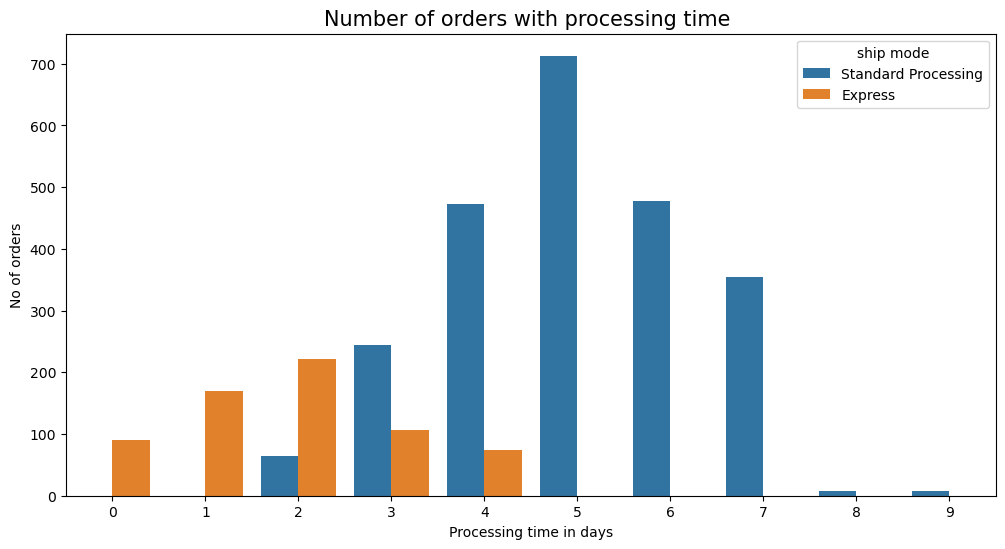

In [124]:
plt.figure(figsize=(12, 6))
f1 = sns.countplot(x=merged_order_process_grouped['process bus days'], hue=merged_order_process_grouped['ship mode'])
f1.tick_params(axis='x', rotation=0)
#f1.set(xlabel=None) # set no label for x-axis 
f1.set_xlabel("Processing time in days", fontsize = 10); # set label for y-axis
f1.set_ylabel("No of orders", fontsize = 10); # set label for y-axis
f1.set_title('Number of orders with processing time ', fontsize=15); # set title

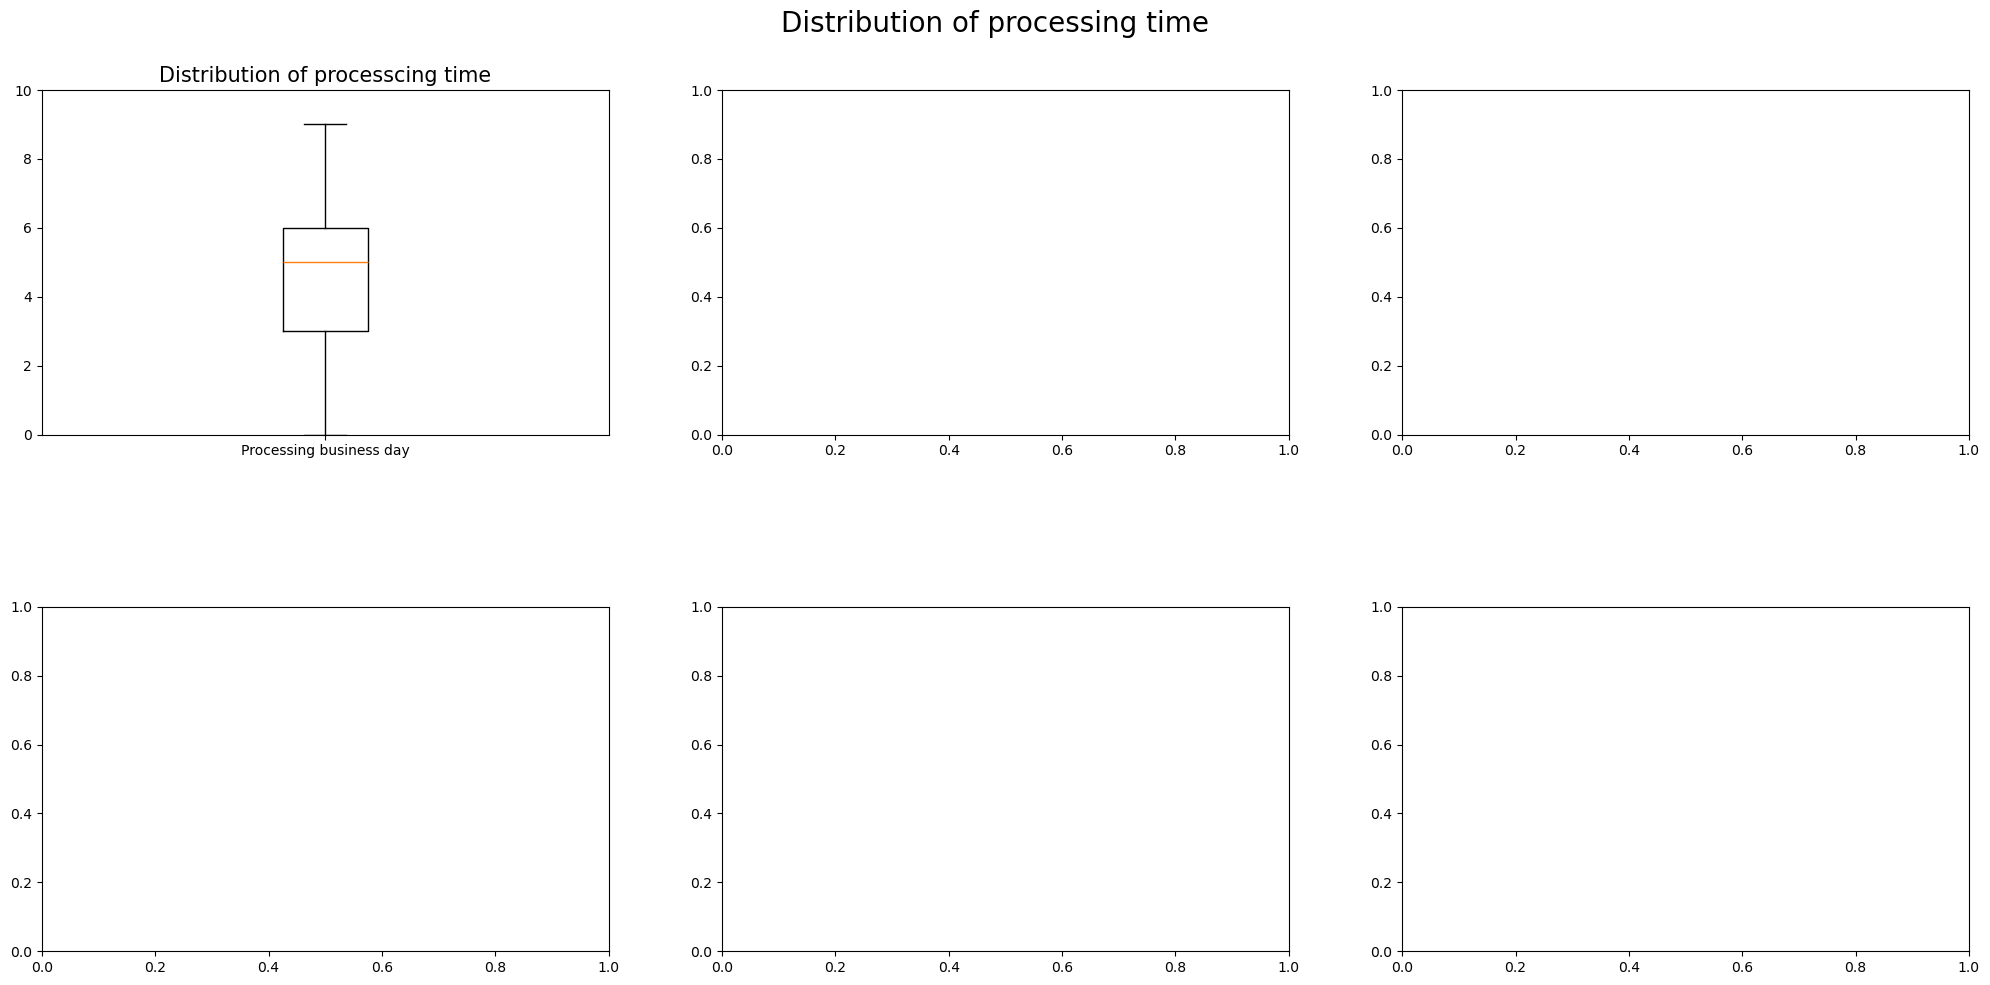

In [127]:
fig, ax = plt.subplots(2,3, figsize=(20,10)) # create subplots on 2 rows and 3 columns
plt.suptitle('Distribution of processing time', fontsize=20)
fig.tight_layout() # tight_layout automatically adjusts subplot params so that the subplot(s) fits in to the figure area
plt.subplots_adjust(hspace = .5, wspace = .2, top = .9) # adjusts the space between the single subplots
ax[0][0].boxplot(x = merged_order_process_grouped['process bus days']) # creates boxplot for number of views
ax[0][0].set_xticklabels(labels=["Processing business day"]) # sets the label for the ticks on the x-axis
ax[0][0].set_ylim(0,10) # limits the y-axis values from 0 to 2000000 
ax[0][0].set_title("Distribution of processcing time", fontsize = 15); # sets title for subplot


## H2 Effect of Product Category on Order Processing Time (Steve): 
Certain product categories require more time for processing and shipping compared to others. (Analysis of average processing time for different product categories)
Also look at the profitability of different product categories


In [160]:
df_h2 = pd.merge(right = df_order_process, left = df_orders, left_on='index', right_on='row id', how='right')

In [161]:
df_h2.columns

Index(['index', 'order id_x', 'order date_x', 'ship mode_x', 'customer id',
       'customer name', 'origin channel', 'country/region', 'city', 'state',
       'postal code', 'region', 'category', 'sub-category', 'product id',
       'sales', 'quantity', 'discount', 'profit', 'row id', 'order id_y',
       'order date_y', 'on truck scan date', 'ship mode_y'],
      dtype='object')

In [162]:
df_h2.drop(columns=[ 'customer id',
       'customer name', 'origin channel', 'country/region', 'city', 'state',
       'postal code', 'region', 'row id', 'order id_y',
       'order date_y','ship mode_y'])

,index,order id_x,order date_x,ship mode_x,category,sub-category,product id,sales,quantity,discount,profit,on truck scan date
0,3074,CA-2019-125206,3/1/2019,First Class,Power Muesli,Steel Cut,OFF-ST-10003692,114.460,2,0.0,28.6150,07/01/2019
1,4919,CA-2019-160304,2/1/2019,Standard Class,Toasted Muesli,With Fruit,FUR-BO-10004709,173.940,3,0.0,38.2668,09/01/2019
2,4920,CA-2019-160304,2/1/2019,Standard Class,Special Projects Muesil,Only Oats,TEC-PH-10000455,231.980,2,0.0,67.2742,09/01/2019
3,8604,US-2019-116365,3/1/2019,Standard Class,Special Projects Muesil,Gluten Free,TEC-AC-10002217,30.080,2,0.2,-5.2640,09/01/2019
4,8605,US-2019-116365,3/1/2019,Standard Class,Special Projects Muesil,Gluten Free,TEC-AC-10002942,165.600,3,0.2,-6.2100,09/01/2019
...,...,...,...,...,...,...,...,...,...,...,...,...
5894,908,CA-2020-143259,30/12/2020,Standard Class,Special Projects Muesil,Only Oats,TEC-PH-10004774,90.930,7,0.0,2.7279,06/01/2021
5895,909,CA-2020-143259,30/12/2020,Standard Class,Power Muesli,Super Fibre Boost,OFF-BI-10003684,52.776,3,0.2,19.7910,06/01/2021
5896,1297,CA-2020-115427,30/12/2020,Standard Class,Power Muesli,Super Fibre Boost,OFF-BI-10002103,13.904,2,0.2,4.5188,06/01/2021
5897,1298,CA-2020-115427,30/12/2020,Standard Class,Power Muesli,Super Fibre Boost,OFF-BI-10004632,20.720,2,0.2,6.4750,06/01/2021


In [163]:
df_h2_process = df_h2[['category','sub-category','order date_x', 'on truck scan date']]

In [164]:
df_h2_process

,category,sub-category,order date_x,on truck scan date
0,Power Muesli,Steel Cut,3/1/2019,07/01/2019
1,Toasted Muesli,With Fruit,2/1/2019,09/01/2019
2,Special Projects Muesil,Only Oats,2/1/2019,09/01/2019
3,Special Projects Muesil,Gluten Free,3/1/2019,09/01/2019
4,Special Projects Muesil,Gluten Free,3/1/2019,09/01/2019
...,...,...,...,...
5894,Special Projects Muesil,Only Oats,30/12/2020,06/01/2021
5895,Power Muesli,Super Fibre Boost,30/12/2020,06/01/2021
5896,Power Muesli,Super Fibre Boost,30/12/2020,06/01/2021
5897,Power Muesli,Super Fibre Boost,30/12/2020,06/01/2021


In [165]:
df_h2_process.columns

Index(['category', 'sub-category', 'order date_x', 'on truck scan date'], dtype='object')

In [166]:
df_h2_process.columns = ['category', 'sub-category', 'order_date', 'on_truck_scan_date']

In [167]:
df_h2_process

,category,sub-category,order_date,on_truck_scan_date
0,Power Muesli,Steel Cut,3/1/2019,07/01/2019
1,Toasted Muesli,With Fruit,2/1/2019,09/01/2019
2,Special Projects Muesil,Only Oats,2/1/2019,09/01/2019
3,Special Projects Muesil,Gluten Free,3/1/2019,09/01/2019
4,Special Projects Muesil,Gluten Free,3/1/2019,09/01/2019
...,...,...,...,...
5894,Special Projects Muesil,Only Oats,30/12/2020,06/01/2021
5895,Power Muesli,Super Fibre Boost,30/12/2020,06/01/2021
5896,Power Muesli,Super Fibre Boost,30/12/2020,06/01/2021
5897,Power Muesli,Super Fibre Boost,30/12/2020,06/01/2021


In [168]:
df_h2_process['order_date']= pd.to_datetime(df_h2_process['order_date'], format = 'mixed', dayfirst=True)

/var/folders/hx/_2z7hvzn1vd1d_smlbfzlbhc0000gn/T/ipykernel_1841/1284660877.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_h2_process['order_date']= pd.to_datetime(df_h2_process['order_date'], format = 'mixed', dayfirst=True)


In [169]:
df_h2_process['on_truck_scan_date']= pd.to_datetime(df_h2_process['on_truck_scan_date'], format = 'mixed', dayfirst=True)

/var/folders/hx/_2z7hvzn1vd1d_smlbfzlbhc0000gn/T/ipykernel_1841/3411407758.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_h2_process['on_truck_scan_date']= pd.to_datetime(df_h2_process['on_truck_scan_date'], format = 'mixed', dayfirst=True)


In [170]:
df_h2_process

,category,sub-category,order_date,on_truck_scan_date
0,Power Muesli,Steel Cut,2019-01-03,2019-01-07
1,Toasted Muesli,With Fruit,2019-01-02,2019-01-09
2,Special Projects Muesil,Only Oats,2019-01-02,2019-01-09
3,Special Projects Muesil,Gluten Free,2019-01-03,2019-01-09
4,Special Projects Muesil,Gluten Free,2019-01-03,2019-01-09
...,...,...,...,...
5894,Special Projects Muesil,Only Oats,2020-12-30,2021-01-06
5895,Power Muesli,Super Fibre Boost,2020-12-30,2021-01-06
5896,Power Muesli,Super Fibre Boost,2020-12-30,2021-01-06
5897,Power Muesli,Super Fibre Boost,2020-12-30,2021-01-06


In [171]:
df_h2_process['processing_bus_days']= np.busday_count(df_h2_process['order_date'].dt.date.values.astype('datetime64[D]'),
                                                   df_h2_process['on_truck_scan_date'].dt.date.values.astype('datetime64[D]'))

/var/folders/hx/_2z7hvzn1vd1d_smlbfzlbhc0000gn/T/ipykernel_1841/1396486407.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_h2_process['processing_bus_days']= np.busday_count(df_h2_process['order_date'].dt.date.values.astype('datetime64[D]'),


In [172]:
df_h2_process

,category,sub-category,order_date,on_truck_scan_date,processing_bus_days
0,Power Muesli,Steel Cut,2019-01-03,2019-01-07,2
1,Toasted Muesli,With Fruit,2019-01-02,2019-01-09,5
2,Special Projects Muesil,Only Oats,2019-01-02,2019-01-09,5
3,Special Projects Muesil,Gluten Free,2019-01-03,2019-01-09,4
4,Special Projects Muesil,Gluten Free,2019-01-03,2019-01-09,4
...,...,...,...,...,...
5894,Special Projects Muesil,Only Oats,2020-12-30,2021-01-06,5
5895,Power Muesli,Super Fibre Boost,2020-12-30,2021-01-06,5
5896,Power Muesli,Super Fibre Boost,2020-12-30,2021-01-06,5
5897,Power Muesli,Super Fibre Boost,2020-12-30,2021-01-06,5


In [199]:
df_h2_P= df_h2_process[['category','processing_bus_days']].groupby('category').agg({'processing_bus_days':'mean'}).reset_index()

In [200]:
df_h2_P

,category,processing_bus_days
0,Power Muesli,4.376121
1,Special Projects Muesil,4.267775
2,Toasted Muesli,4.341346


In [203]:
df_h2_P.describe()

,processing_bus_days
count,3.000000
mean,4.328414
std,0.055319
min,4.267775
25%,4.304560
50%,4.341346
75%,4.358734
max,4.376121


In [182]:
df_campaign

,order id,arrival scan date,customer name
0,CA-2019-109666,03/05/2019,Kunst Miller
1,CA-2019-138933,03/05/2019,Jack Lebron
2,CA-2019-130001,03/05/2019,Heather Kirkland
3,CA-2019-113061,06/05/2019,Ed Ludwig
4,CA-2019-162138,06/05/2019,Grace Kelly
...,...,...,...
328,CA-2020-129707,08/05/2020,Larry Hughes
329,CA-2020-125381,08/05/2020,Speros Goranitis
330,CA-2020-141733,15/05/2020,Rick Wilson
331,US-2020-104451,15/05/2020,Michelle Moray


In [191]:
df_orders_p = df_orders[['order id','category']].drop_duplicates(keep='first')
df_orders_p

,order id,category
0,CA-2019-121755,Special Projects Muesil
1,CA-2019-118255,Special Projects Muesil
2,CA-2019-169194,Special Projects Muesil
3,CA-2019-111682,Special Projects Muesil
4,CA-2018-135545,Special Projects Muesil
...,...,...
9987,US-2019-125402,Toasted Muesli
9988,CA-2019-122581,Toasted Muesli
9991,CA-2018-132388,Toasted Muesli
9992,CA-2019-149272,Toasted Muesli


In [192]:
df_h2_S = pd.merge(left = df_campaign, right = df_orders_p, how = 'left', on='order id')

In [193]:
df_h2_S

,order id,arrival scan date,customer name,category
0,CA-2019-109666,03/05/2019,Kunst Miller,Power Muesli
1,CA-2019-109666,03/05/2019,Kunst Miller,Special Projects Muesil
2,CA-2019-138933,03/05/2019,Jack Lebron,Power Muesli
3,CA-2019-130001,03/05/2019,Heather Kirkland,Power Muesli
4,CA-2019-113061,06/05/2019,Ed Ludwig,Toasted Muesli
...,...,...,...,...
454,CA-2020-125381,08/05/2020,Speros Goranitis,Special Projects Muesil
455,CA-2020-141733,15/05/2020,Rick Wilson,Power Muesli
456,CA-2020-141733,15/05/2020,Rick Wilson,Toasted Muesli
457,US-2020-104451,15/05/2020,Michelle Moray,Power Muesli


## H4 Express Shipping Reduces Order Delivery Time:
Null Hypothesis (H0): There is no significant difference in order delivery time between orders with express shipping and orders with standard shipping
Alternative Hypothesis (H1): Orders with express shipping have a shorter delivery time compared to orders with standard shipping 
(dataframe needed: arrival)

Alternative Hypothesis (H1): Orders with express shipping have a shorter delivery time compared to orders with standard shipping 

In [204]:
arrival

,order id,order date,sales,quantity,on truck scan date,ship mode,arrival scan date,total ship time,ship time bus day
0,CA-2019-109666,2019-04-19,633.040,19,2019-04-29,Standard Processing,2019-05-03,4,4
1,CA-2019-138933,2019-04-24,3.984,1,2019-04-29,Express,2019-05-03,4,4
2,CA-2019-130001,2019-04-23,36.240,5,2019-05-01,Standard Processing,2019-05-03,2,2
3,CA-2019-113061,2019-04-22,86.620,2,2019-04-29,Standard Processing,2019-05-06,7,5
4,CA-2019-162138,2019-04-23,351.510,7,2019-05-01,Standard Processing,2019-05-06,5,3
...,...,...,...,...,...,...,...,...,...
328,CA-2020-129707,2020-04-25,8.896,4,2020-05-04,Standard Processing,2020-05-08,4,4
329,CA-2020-125381,2020-04-25,107.970,3,2020-05-01,Standard Processing,2020-05-08,7,5
330,CA-2020-141733,2020-05-07,2049.534,10,2020-05-13,Standard Processing,2020-05-15,2,2
331,US-2020-104451,2020-05-08,81.080,4,2020-05-13,Standard Processing,2020-05-15,2,2


In [211]:
df_mode_cal= arrival.groupby('ship mode').agg({'total ship time': 'mean'}).reset_index()

In [215]:
df_mode_cal

,ship mode,total ship time
0,Express,4.480000
1,Standard Processing,4.639535


In [216]:
df_mode_bus= arrival.groupby('ship mode').agg({'ship time bus day': 'mean'}).reset_index()

In [217]:
df_mode_bus

,ship mode,ship time bus day
0,Express,2.853333
1,Standard Processing,2.941860


In [220]:
arrival['whole process cal days']= (arrival['arrival scan date']- arrival['order date']).dt.days

In [221]:
arrival

,order id,order date,sales,quantity,on truck scan date,ship mode,arrival scan date,total ship time,ship time bus day,whole process cal days
0,CA-2019-109666,2019-04-19,633.040,19,2019-04-29,Standard Processing,2019-05-03,4,4,14
1,CA-2019-138933,2019-04-24,3.984,1,2019-04-29,Express,2019-05-03,4,4,9
2,CA-2019-130001,2019-04-23,36.240,5,2019-05-01,Standard Processing,2019-05-03,2,2,10
3,CA-2019-113061,2019-04-22,86.620,2,2019-04-29,Standard Processing,2019-05-06,7,5,14
4,CA-2019-162138,2019-04-23,351.510,7,2019-05-01,Standard Processing,2019-05-06,5,3,13
...,...,...,...,...,...,...,...,...,...,...
328,CA-2020-129707,2020-04-25,8.896,4,2020-05-04,Standard Processing,2020-05-08,4,4,13
329,CA-2020-125381,2020-04-25,107.970,3,2020-05-01,Standard Processing,2020-05-08,7,5,13
330,CA-2020-141733,2020-05-07,2049.534,10,2020-05-13,Standard Processing,2020-05-15,2,2,8
331,US-2020-104451,2020-05-08,81.080,4,2020-05-13,Standard Processing,2020-05-15,2,2,7


In [222]:
arrival['whole process bus days'] = np.busday_count(arrival['order date'].dt.date.values.astype('datetime64[D]'), 
                                                   arrival['arrival scan date'].dt.date.values.astype('datetime64[D]'))

In [223]:
arrival

,order id,order date,sales,quantity,on truck scan date,ship mode,arrival scan date,total ship time,ship time bus day,whole process cal days,whole process bus days
0,CA-2019-109666,2019-04-19,633.040,19,2019-04-29,Standard Processing,2019-05-03,4,4,14,10
1,CA-2019-138933,2019-04-24,3.984,1,2019-04-29,Express,2019-05-03,4,4,9,7
2,CA-2019-130001,2019-04-23,36.240,5,2019-05-01,Standard Processing,2019-05-03,2,2,10,8
3,CA-2019-113061,2019-04-22,86.620,2,2019-04-29,Standard Processing,2019-05-06,7,5,14,10
4,CA-2019-162138,2019-04-23,351.510,7,2019-05-01,Standard Processing,2019-05-06,5,3,13,9
...,...,...,...,...,...,...,...,...,...,...,...
328,CA-2020-129707,2020-04-25,8.896,4,2020-05-04,Standard Processing,2020-05-08,4,4,13,9
329,CA-2020-125381,2020-04-25,107.970,3,2020-05-01,Standard Processing,2020-05-08,7,5,13,9
330,CA-2020-141733,2020-05-07,2049.534,10,2020-05-13,Standard Processing,2020-05-15,2,2,8,6
331,US-2020-104451,2020-05-08,81.080,4,2020-05-13,Standard Processing,2020-05-15,2,2,7,5


In [224]:
arrival.groupby('ship mode').agg({'whole process cal days':'mean'}).reset_index()

,ship mode,whole process cal days
0,Express,7.053333
1,Standard Processing,11.934109


In [225]:
arrival.groupby('ship mode').agg({'whole process bus days':'mean'}).reset_index()

,ship mode,whole process bus days
0,Express,4.800000
1,Standard Processing,8.155039


In [226]:
on_truck

,order id,order date,sales,quantity,on truck scan date,ship mode,process days,process bus days
0,CA-2019-100041,2019-11-20,328.540,6,2019-11-27,Standard Processing,7,5
1,CA-2019-100083,2019-11-24,24.784,1,2019-12-04,Standard Processing,10,7
2,CA-2019-100153,2019-12-13,63.880,4,2019-12-18,Standard Processing,5,3
3,CA-2019-100202,2019-12-31,302.376,3,2020-01-08,Standard Processing,8,6
4,CA-2019-100244,2019-09-20,475.694,19,2019-09-25,Standard Processing,5,3
...,...,...,...,...,...,...,...,...
2997,US-2020-168802,2020-11-03,18.368,4,2020-11-12,Standard Processing,9,7
2998,US-2020-169320,2020-07-23,171.430,7,2020-07-29,Standard Processing,6,4
2999,US-2020-169488,2020-09-07,56.860,7,2020-09-09,Express,2,2
3000,US-2020-169502,2020-08-28,113.410,8,2020-09-02,Standard Processing,5,3


In [227]:
on_truck.groupby('ship mode').agg({'process days':'mean'}).reset_index()

,ship mode,process days
0,Express,2.620846
1,Standard Processing,7.091880


In [229]:
on_truck.groupby('ship mode').agg({'process bus days':'mean'}).reset_index()

,ship mode,process bus days
0,Express,1.854985
1,Standard Processing,5.032906


In [ ]:
#profit vs shipping mode

In [231]:
df_orders.head(3)

,index,order id,order date,ship mode,customer id,customer name,origin channel,country/region,city,state,postal code,region,category,sub-category,product id,sales,quantity,discount,profit
0,27,CA-2019-121755,16/1/2019,Second Class,EH-13945,Eric Hoffmann,Email,United States,Los Angeles,California,90049.0,West,Special Projects Muesil,Gluten Free,TEC-AC-10003027,90.57,3,0.0,11.7741
1,45,CA-2019-118255,11/3/2019,First Class,ON-18715,Odella Nelson,Sales,United States,Eagan,Minnesota,55122.0,Central,Special Projects Muesil,Gluten Free,TEC-AC-10000171,45.98,2,0.0,19.7714
2,48,CA-2019-169194,20/6/2019,Standard Class,LH-16900,Lena Hernandez,Email,United States,Dover,Delaware,19901.0,East,Special Projects Muesil,Gluten Free,TEC-AC-10002167,45.00,3,0.0,4.9500


In [239]:
df_profit_mode = df_orders.groupby('ship mode').agg({'profit': 'mean' }).reset_index()

In [240]:
df_profit_mode

,ship mode,profit
0,First Class,31.168476
1,Second Class,29.535545
2,Standard Class,27.501399


In [242]:
df_orders.groupby('category').agg({'profit': 'mean'}).reset_index()

,category,profit
0,Power Muesli,20.327050
1,Special Projects Muesil,78.752002
2,Toasted Muesli,8.709119


In [243]:
df_orders.groupby('sub-category').agg({'profit': 'mean'}).reset_index()

,sub-category,profit
0,Gluten Free,54.111788
1,Hunger Buster,-6.258418
2,Low Sugar,29.432669
3,Maple Sweetened,4.375660
4,Mega Protein,38.922758
5,No Taste All Power,15.236962
6,Nuts and more,24.856620
7,Only Oats,50.073938
8,Organic,817.909190
9,Power Clean Fibre Boost,27.418019
